In [5]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from pandas_datareader import data as pdr
from datetime import datetime, timedelta
import data_util  
yf.pdr_override()

sns.set(rc={'figure.figsize':(20, 15)})

temp = dict(layout=go.Layout(font=dict(family="Franklin Gothic", size=12), width=800))

import warnings
warnings.filterwarnings('ignore')


[*********************100%%**********************]  1 of 1 completed


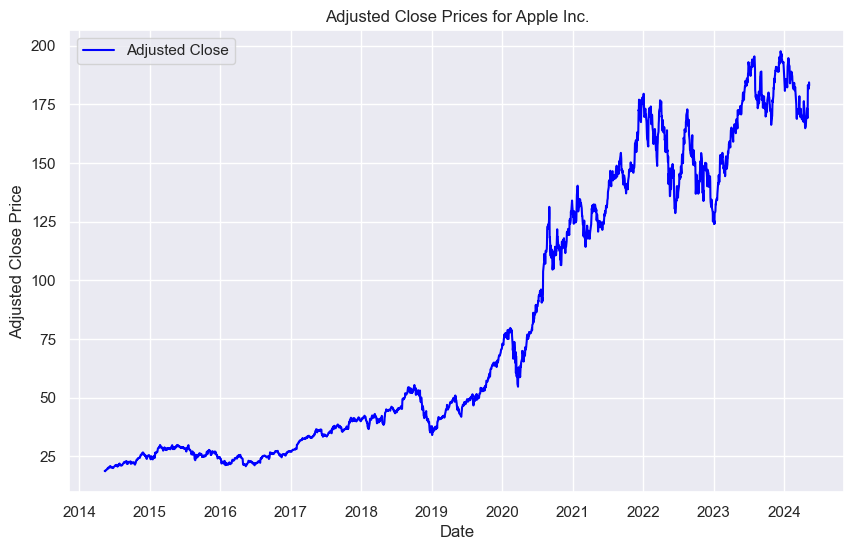

In [6]:
apple_stocks=data_util.stock_data('AAPL', 10,'Apple')
data_util.plot(apple_stocks,'Apple')

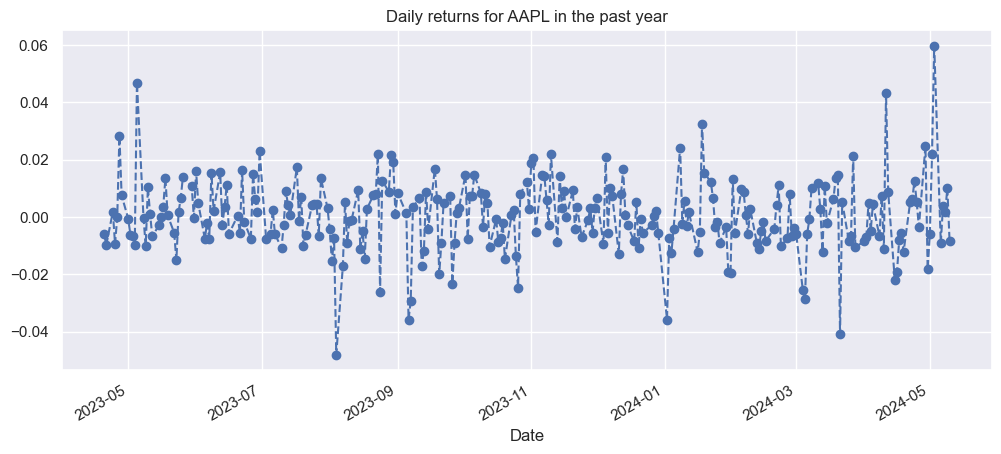

In [7]:

last_year_data = apple_stocks.loc['2023-04-19':]

last_year_data['Daily Return'] = last_year_data['Close'].pct_change()

last_year_data['Daily Return'].plot(figsize=(12,5),linestyle='--',marker = 'o')
plt.title("Daily returns for AAPL in the past year")
plt.show()


**USING SIMPLE MOVING AVERAGES TO GIVE A NAIVE/AVERAGE IDEA OF PRICE MOVEMENTS**

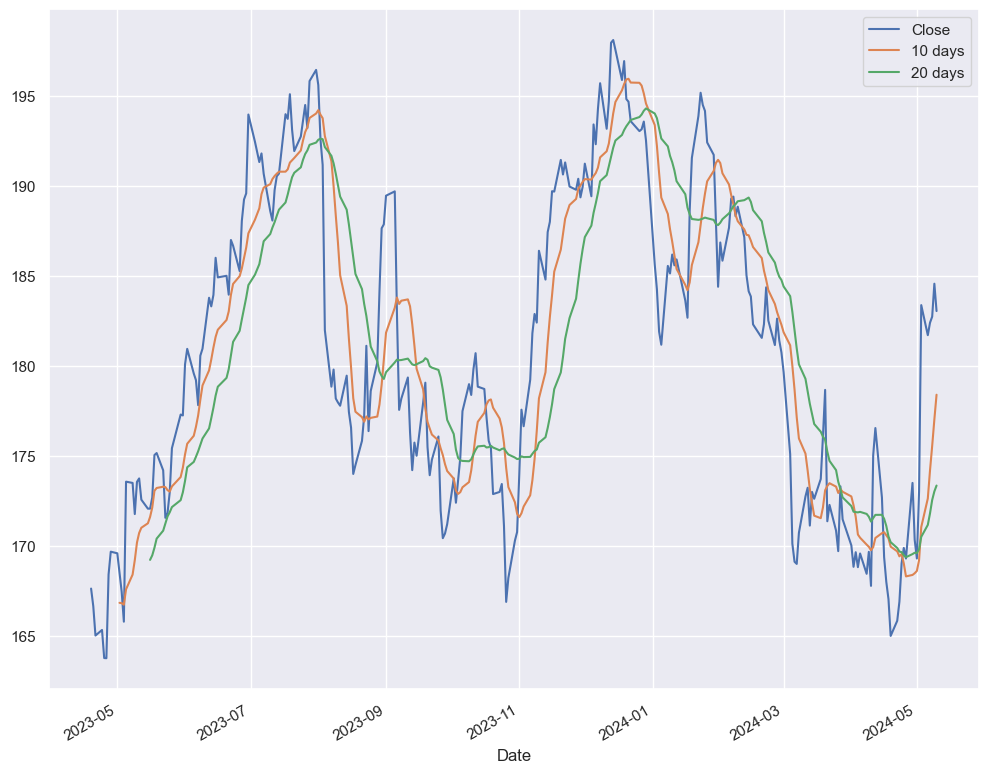

In [8]:

def calculate_and_plot_moving_averages(data, periods):
    for p in periods:
        column_name = f"{p} days"
        data[column_name] = data['Close'].rolling(window=p).mean()

    data[['Close'] + [f'{p} days' for p in periods]].plot(subplots=False, figsize=(12,10))
    plt.show()


periods = [10,20]
calculate_and_plot_moving_averages(last_year_data, periods)


In [9]:
apple_stocks.head(10)

,Open,High,Low,Close,Adj Close,Volume,comany_name
Date,,,,,,,
2014-05-12,20.981787,21.202143,20.978571,21.172501,18.727827,213208800,Apple
2014-05-13,21.142857,21.233570,21.096430,21.205713,18.757198,159737200,Apple
2014-05-14,21.158215,21.335714,21.133572,21.209642,18.760672,166404000,Apple
2014-05-15,21.239286,21.307142,21.001429,21.029285,18.601145,230846000,Apple
2014-05-16,21.022499,21.340357,20.907143,21.339643,18.875673,276256400,Apple
2014-05-19,21.351786,21.690357,21.333214,21.592501,19.099329,317755200,Apple
2014-05-20,21.589643,21.657143,21.454643,21.596786,19.103117,234836000,Apple
2014-05-21,21.565357,21.667856,21.502144,21.653929,19.153667,196859600,Apple
2014-05-22,21.664286,21.780357,21.575001,21.688213,19.183989,200760000,Apple


In [10]:
fig = go.Figure(data=[go.Candlestick(x=apple_stocks.index,
                open=apple_stocks.Open,
                high=apple_stocks.High,
                low=apple_stocks.Low,
                close=apple_stocks.Close)])

fig.update_layout(
    title='AAPL Stock Candlestick Chart',
    yaxis_title='AAPL',
)

fig.show()

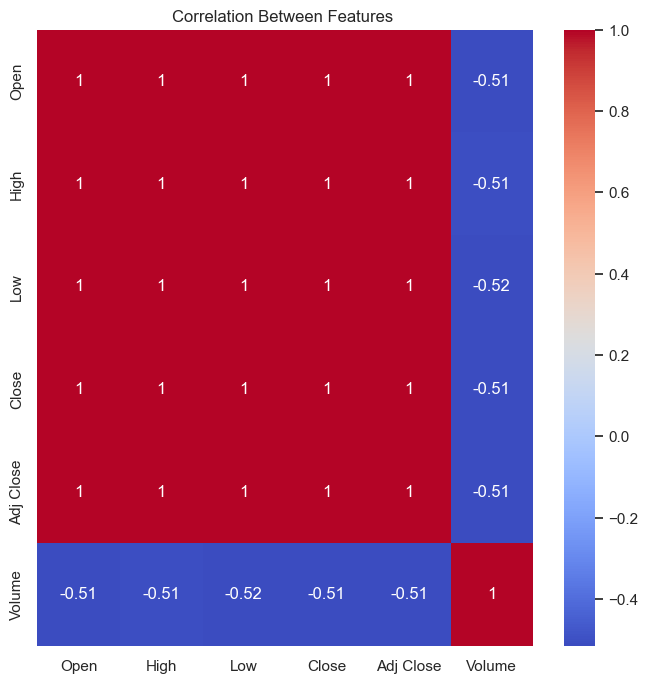

In [11]:
# Create a heatmap of the correlation between stock price's features
corr = apple_stocks[['Open', 'High', 'Low', 'Close','Adj Close','Volume']].corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Between Features ')
plt.show()